In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)

## Recipes EDA

1. n_step, n_ingredient, minutes distribution
2. Wordcloud of description
3. Wordcloud of ingredients

In [ ]:
df_rawrecipe = pd.read_csv ('/content/drive/MyDrive/IntroML/data/RAW_recipes.csv')
df_rawrecipe.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


#### n_steps, n_ingredient,minutes distribution

x = number of steps/ingredients/minutes

y = count of recipes

In [ ]:
df_rawrecipe.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d56c8d590>,
      dtype=object)

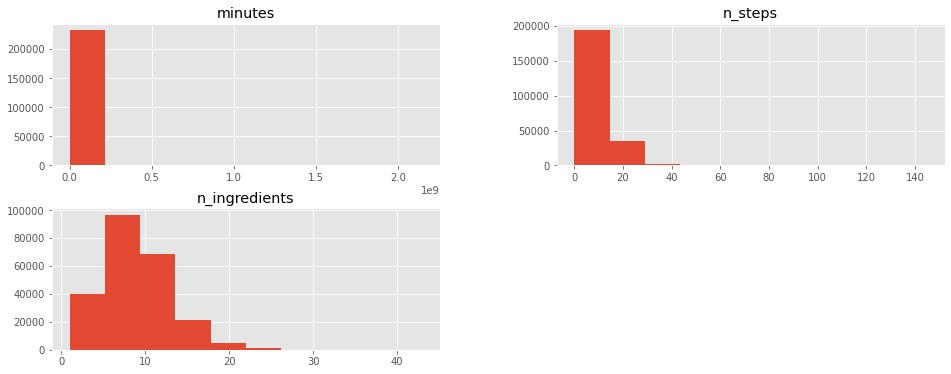

In [ ]:
df_rawrecipe[['minutes','n_steps','n_ingredients']].hist()

Text(0.5, 1.0, 'Ingredient Distribution')

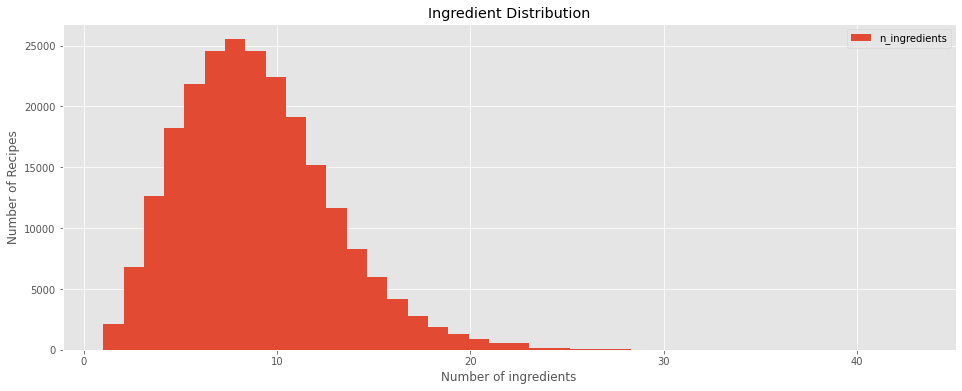

In [ ]:
df_rawrecipe[['n_ingredients']].plot(kind='hist',
                                     bins=40)

plt.xlabel('Number of ingredients')
plt.ylabel('Number of Recipes')
plt.title('Ingredient Distribution')

Text(0.5, 1.0, 'Step Count Distribution')

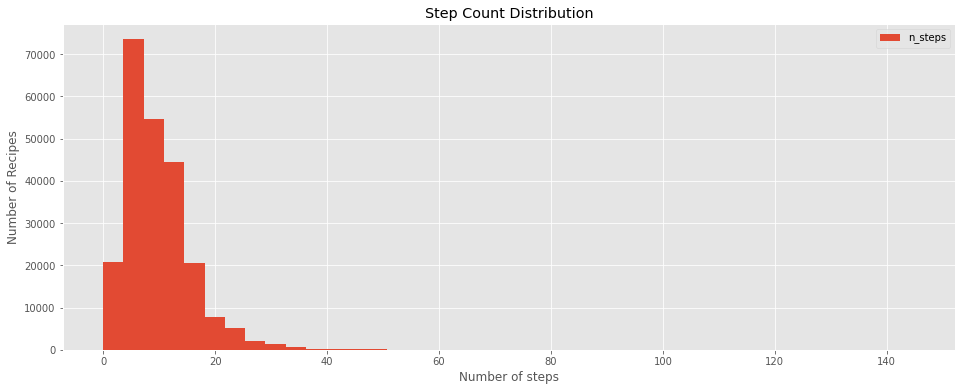

In [ ]:
df_rawrecipe[['n_steps']].plot(kind='hist',
                                     bins=40)

plt.xlabel('Number of steps')
plt.ylabel('Number of Recipes')
plt.title('Step Count Distribution')

Text(0.5, 1.0, 'Minutes Distribution')

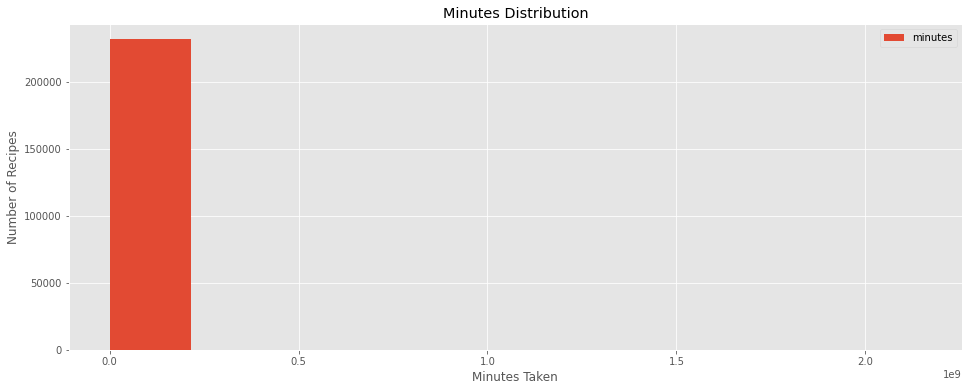

In [ ]:
df_rawrecipe[['minutes']].plot(kind='hist')

plt.xlabel('Minutes Taken')
plt.ylabel('Number of Recipes')
plt.title('Minutes Distribution')

**Findings:**

There seems to be quite a few outliers, so I'll plot a boxplot to have a look...

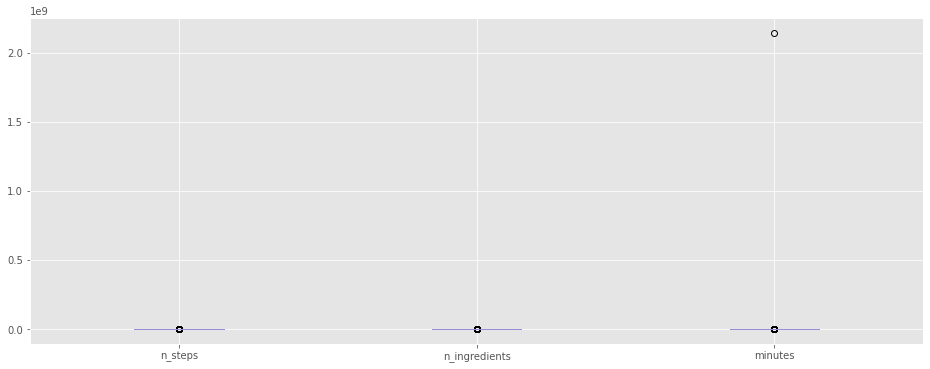

In [ ]:
df_rawrecipe[['n_steps','n_ingredients','minutes']].plot(kind='box')

### Wordcloud for description of recipes

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# grab only the descriptions & ingredients from original dataframe
df_recipe_desc = df_rawrecipe[['description']]
df_recipe_desc.head()

,description
0,autumn is my favorite time of year to cook! th...
1,this recipe calls for the crust to be prebaked...
2,this modified version of 'mom's' chili was a h...
3,"this is a super easy, great tasting, make ahea..."
4,my dh's amish mother raised him on this recipe...


In [ ]:
# Apply a round of text cleaning techniques
import re 
import string

def clean_text_1(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df_recipe_desc['description'] = df_recipe_desc['description'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_recipe_desc = pd.DataFrame(df_recipe_desc['description'].apply(clean_text_1))
df_recipe_desc.head()

AttributeError: ignored

In [ ]:
desc_all = " ".join(cell for cell in df_recipe_desc['description'])

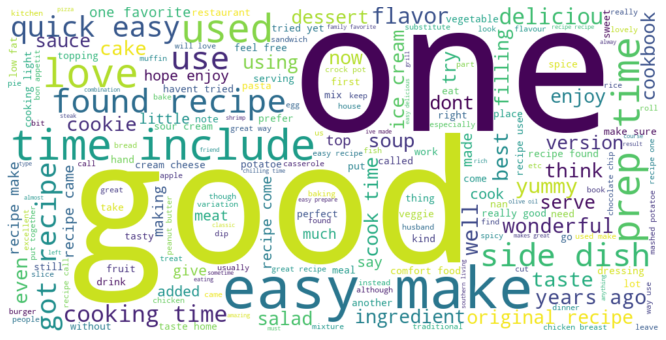

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1000, height=500).generate(desc_all)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud for ingredients

In [ ]:
# grab only the ingredients from original dataframe
df_ingred = df_rawrecipe[['ingredients']]
df_ingred.head()

,ingredients
0,"['winter squash', 'mexican seasoning', 'mixed ..."
1,"['prepared pizza crust', 'sausage patty', 'egg..."
2,"['ground beef', 'yellow onions', 'diced tomato..."
3,"['spreadable cheese with garlic and herbs', 'n..."
4,"['tomato juice', 'apple cider vinegar', 'sugar..."


In [ ]:
df_ingred = pd.DataFrame(df_ingred['ingredients'].apply(clean_text_1))
df_ingred.head()

,ingredients
0,winter squash mexican seasoning mixed spice ho...
1,prepared pizza crust sausage patty eggs milk s...
2,ground beef yellow onions diced tomatoes tomat...
3,spreadable cheese with garlic and herbs new po...
4,tomato juice apple cider vinegar sugar salt pe...


In [ ]:
# combine into 1 string
ingred_all = " ".join(cell for cell in df_ingred['ingredients'])

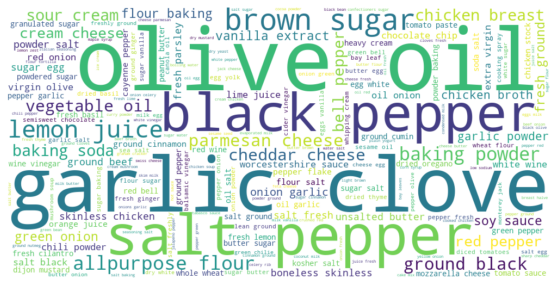

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1000, height=500).generate(ingred_all)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Interactions EDA  
1. Rating distribution (from 1-5)
2. Number of ratings given by user vs average rating of user
3. Number of ratings for each recipe and avg rating of recipe 
4. Number of reviews made over time (over each year, over each month, over 31 days)
5. Wordcloud of reviews 
  
  a. Wordcloud of ratings from 1-5

In [ ]:
df_rawinteraction = pd.read_csv ('/content/drive/MyDrive/IntroML/data/RAW_interactions.csv')
df_rawinteraction.head(3)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...


### Rating Distribution

In [ ]:
df_rawinteraction.rating.value_counts()

5    816364
4    187360
0     60847
3     40855
2     14123
1     12818
Name: rating, dtype: int64

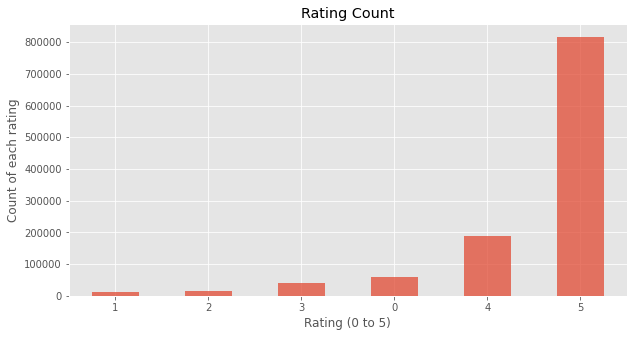

In [ ]:
df_rawinteraction['rating'].value_counts(ascending=True).plot(kind="bar", 
                                                              title="Rating Count", 
                                                              alpha=0.75,
                                                              rot=0, 
                                                              xlabel="Rating (0 to 5)", 
                                                              ylabel="Count of each rating"
                                                              )

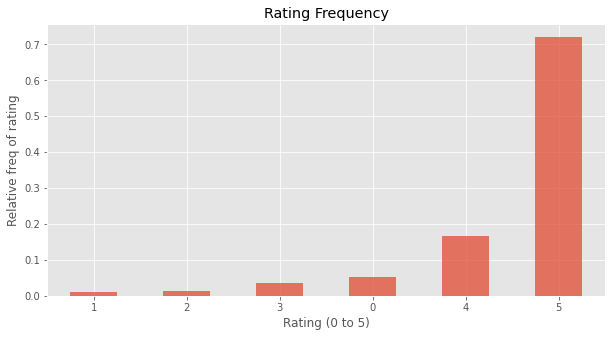

In [ ]:
df_rawinteraction['rating'].value_counts(ascending=True,normalize=True).plot(kind="bar", 
                                                                             alpha=0.75, 
                                                                             title="Rating Frequency", 
                                                                             rot=0, 
                                                                             xlabel="Rating (0 to 5)", 
                                                                             ylabel="Relative freq of rating",
                                                                             )

### Total reviews made by user vs avg rating of user

In [ ]:
df_user_interaction = df_rawinteraction.groupby('user_id')

In [ ]:
df_user_rating = pd.concat([df_user_interaction['rating'].mean(), df_user_interaction['rating'].sum()], axis=1)
df_user_rating.columns = ['avg_rating','total_rating']
print(df_user_rating)

            avg_rating  total_rating
user_id                             
1533          4.710938           603
1535          4.473552          3552
1581          5.000000             5
1634          3.616667           217
1676          4.677419           145
...                ...           ...
2002371755    5.000000             5
2002371792    4.000000             4
2002371843    5.000000             5
2002372464    4.000000             4
2002372706    5.000000             5

[226570 rows x 2 columns]


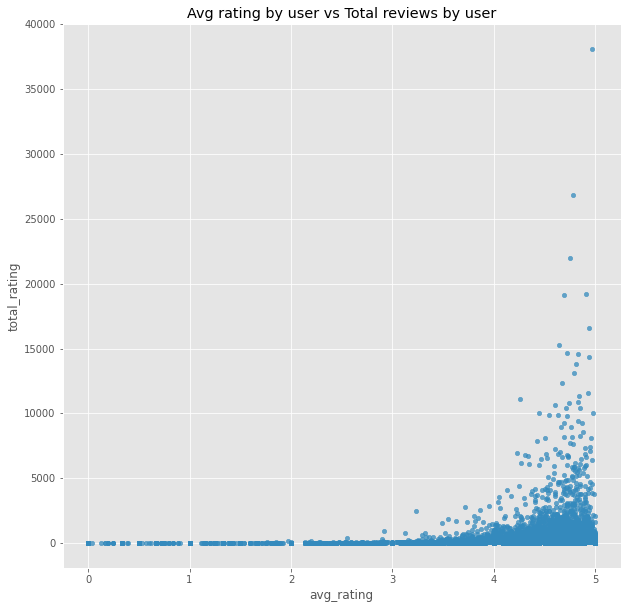

In [ ]:
# y = total reviews of each user
# x = avg review of each user
#each plot in the graph is an individual user

df_user_rating.plot(kind='scatter',
                    title='Avg rating by user vs Total reviews by user',
                    alpha=0.75,
                    x='avg_rating',
                    y='total_rating',
                    figsize=(10,10)
                    )

**Findings:**

1) Seems to be 1-2 outliers in the dataset, where they made too many reviews compared to the rest of the sample size

2) Generally, most of the users gave ratings between 3.5 - 5

3) Most users made between 0 - 7000+ reviews

In [ ]:
#getting outliers in the dataset

df_user_rating['total_rating'].idxmax()

424680

### Total ratings for a recipe vs avg rating of a recipe

In [ ]:
df_recipe_interaction = df_rawinteraction.groupby('recipe_id')

In [ ]:
df_recipe_rating = pd.concat([df_recipe_interaction['rating'].mean(), df_recipe_interaction['rating'].sum()], axis=1)
df_recipe_rating.columns = ['avg_rating','total_rating']
print(df_recipe_rating)

           avg_rating  total_rating
recipe_id                          
38           4.250000            17
39           3.000000             3
40           4.333333            39
41           4.500000             9
43           1.000000             1
...               ...           ...
537459       5.000000             5
537485       5.000000             5
537543       0.000000             0
537671       0.000000             0
537716       5.000000             5

[231637 rows x 2 columns]


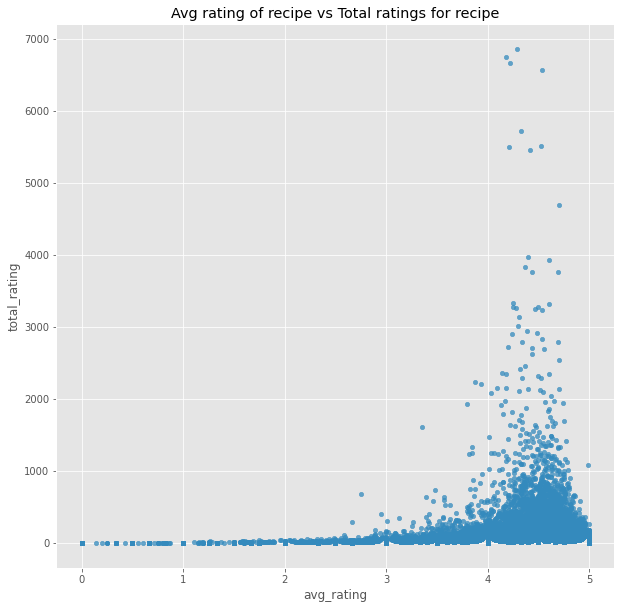

In [ ]:
# y = total reviews of each recipe
# x = avg review for each recipe
#each plot in the graph is an individual recipe

df_recipe_rating.plot(kind='scatter',
                      title='Avg rating of recipe vs Total ratings for recipe',
                      alpha=0.75,
                      x='avg_rating',
                      y='total_rating',
                      figsize=(10,10)
                      )

**Findings:**

1) A few outliers in the dataset

2) Most of the recipes receive between 3-4.9 ratings

3) Does total reviews received indicates a popularity of a recipe?

### Reviews made overtime

In [ ]:
# convert the date column from obj type to datetime 
df_rawinteraction['date'] = df_rawinteraction["date"] = df_rawinteraction["date"].astype("datetime64")

In [ ]:
# check the data type for date
df_rawinteraction.dtypes

user_id               int64
recipe_id             int64
date         datetime64[ns]
rating                int64
review               object
dtype: object

In [ ]:
# get earliest and latest datestamp of review made (disregard the time)
print('Earliest review made:', df_rawinteraction['date'].min())
print('Latest review made:', df_rawinteraction['date'].max())

Earliest review made: 2000-01-25 00:00:00
Latest review made: 2018-12-20 00:00:00


In [ ]:
# reviews made in each year from Year2000 to Year2018
df_rawinteraction.groupby(df_rawinteraction['date'].dt.year).count()[['rating']]

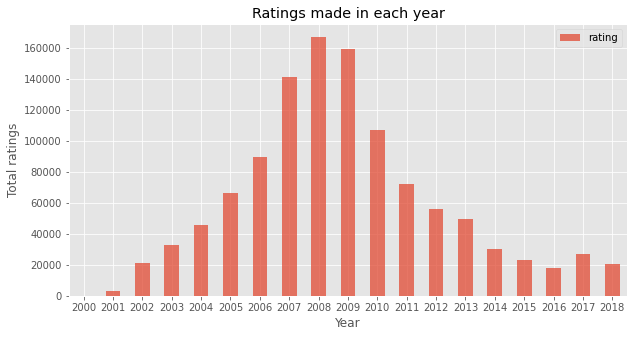

In [ ]:
df_rawinteraction.groupby(df_rawinteraction['date'].dt.year).count()[['rating']].plot(kind='bar',
                                                                                       rot=0,
                                                                                       alpha=0.75,
                                                                                       title='Ratings made in each year',
                                                                                       xlabel='Year',
                                                                                       ylabel='Total ratings'
                                                                                       )

In [ ]:
# reviews made in each month Jan-Dec over 2000-2018
df_rawinteraction.groupby(df_rawinteraction['date'].dt.month).count()[['rating']]

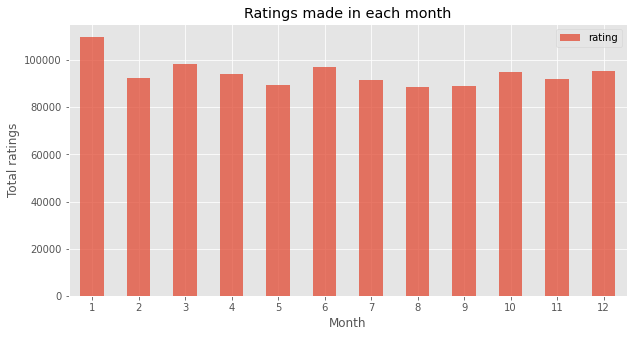

In [ ]:
df_rawinteraction.groupby(df_rawinteraction['date'].dt.month).count()[['rating']].plot(kind='bar',
                                                                                       rot=0,
                                                                                       alpha=0.75,
                                                                                       title='Ratings made in each month',
                                                                                       xlabel='Month',
                                                                                       ylabel='Total ratings'
                                                                                       )

In [ ]:
# reviews made in each day of the month
df_rawinteraction.groupby(df_rawinteraction['date'].dt.day).count()[['rating']]

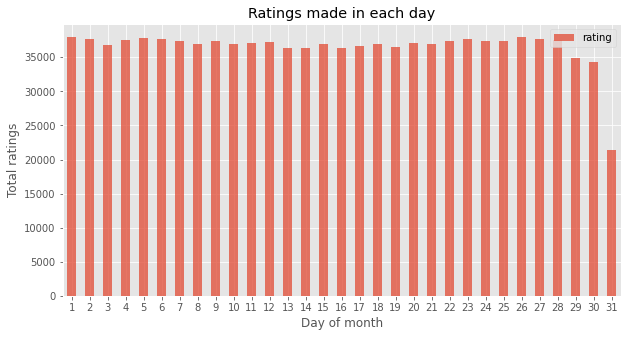

In [ ]:
df_rawinteraction.groupby(df_rawinteraction['date'].dt.day).count()[['rating']].plot(kind='bar',
                                                                                       rot=0,
                                                                                       alpha=0.75,
                                                                                       title='Ratings made in each day',
                                                                                       xlabel='Day of month',
                                                                                       ylabel='Total ratings'
                                                                                       )

**Findings:**

1) Rise in popularity of reviewing, with a peak in about 2018-2019: will it affect how we use the data?

2) More reviews are done in January vs any other month, could be in relation to festive seasons over the holiday period

3) Although there is a significant enough drop in reviews on 29,30,31 (days), it is not a concern as it could just be due to the different days each month has (i.e. Feb only has 28/29 days, while other months have 30/31 days)

### Wordcloud of reviews

In [ ]:
from wordcloud import WordCloud, STOPWORDS

#### for all reviews

In [ ]:
review_all_text = " ".join(cell for cell in df_rawinteraction['review'])

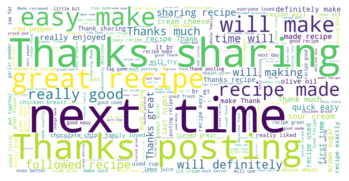

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1000, height=500).generate(review_all_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Word Cloud by rating (1-5 stars)

In [ ]:
# grab only the ratings and their review from the original df
df_review = df_rawinteraction[['rating','review']]

#set the ratings to be the index, and drop the 'rating' column name
df_review = df_review.set_index('rating')
df_review.index.name = None

review    object
dtype: object

In [ ]:
# Apply a round of text cleaning techniques
import re 
import string

def clean_text_1(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df_review = pd.DataFrame(df_review['review'].apply(clean_text_1))
df_review.head()

In [ ]:
df_review['review'] = df_review['review'].astype(str)

In [ ]:
wc = WordCloud(stopwords=STOPWORDS, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

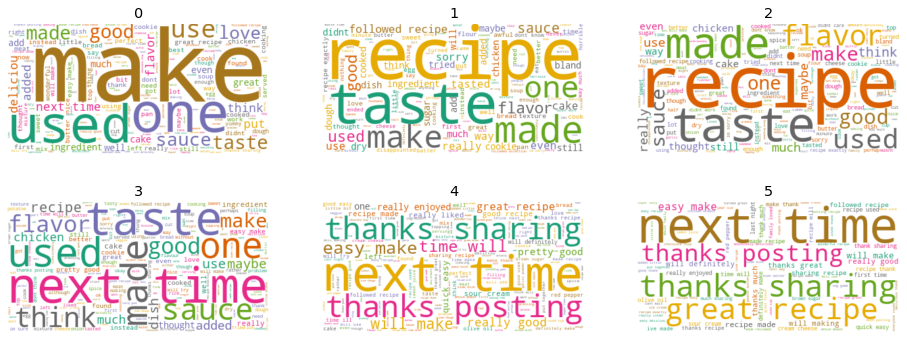

In [ ]:
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [16, 6]

# Create subplots for each category
for i in range(6): #i = 0, 1, 2, 3, 4, 5
    all_review = " ".join(cell for cell in df_review.review[i])  
    wc.generate(all_review) 
    
    plt.subplot(2, 3, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(i)
    
plt.show()


**Findings:**

Need to remove more stopwords